<a href="https://colab.research.google.com/github/seiinkiim/ML_study/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""#선형 회귀"""

"""k-최근접이웃의 한계"""

import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input,train_target)
print(knr.predict([[50]]))


[1033.33333333]


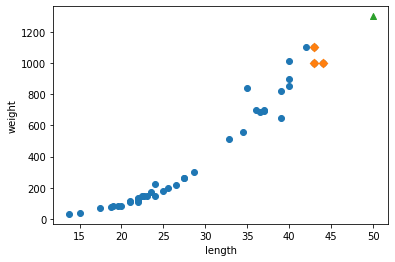

In [ ]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구합니다
distances,indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그립니다
plt.scatter(train_input,train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
#50cm 농어 데이터
plt.scatter(50,1300,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

1033.3333333333333
[1033.33333333]


Text(0, 0.5, 'weight')

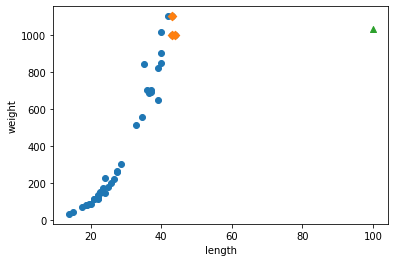

In [ ]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

#100cm 농어의 이웃을 구합니다
distances,indexes=knr.kneighbors([[100]])
#훈련세트의 산점도를 그립니다
plt.scatter(train_input,train_target)
#훈련세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

#100cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')

[1241.83860323]
[39.01714496] -709.0186449535477


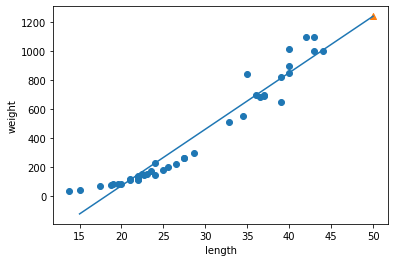

In [ ]:
"""##선형회귀"""

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#선형 회귀 모델을 훈련합니다
lr.fit(train_input,train_target)
#50cm 농어에 대해 예측합니다
print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)
#훈련세트에 대한 산점도를 그립니다
plt.scatter(train_input,train_target)

#15에서 20까지 1차방정식 그래프르 그립니다
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
"""###다항 회귀"""
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

print(train_poly.shape,test_poly.shape)

lr=LinearRegression()
lr.fit(train_poly,train_target) #훈련

print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


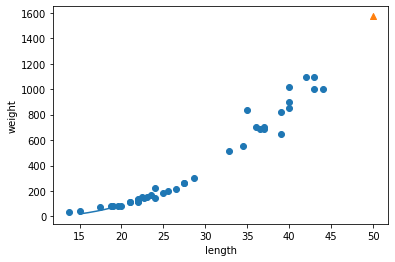

0.9706807451768623
0.9775935108325122


In [ ]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
#구간별 직선이 여러개 이어져서 곡선이 됨
point=np.arange(15,20)
#훈련세트의 산점도를 그립니다
plt.scatter(train_input,train_target)
#15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point,1.01*point**2-21.6*point+116.05)
#50cm 농어 데이터
plt.scatter([50],[1574],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))